# MSDS 432, Assignment 10 - K-Nearest-Neighbors Algorithm

#### Author: Brandon Moretz

In [9]:
%matplotlib inline

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
import matplotlib.style as style
from collections import Counter
import seaborn

In [118]:
np.random.seed(323) # static seed so results are reproducible

In [119]:
style.use('seaborn-poster') # sets the size of the charts
style.use('ggplot') # set the theme for matplotlib

In [120]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Shopper Type

In [164]:
class Shopper:
    '''Shopper class used as a simple data container'''
    def __init__(self, num, eggs, bread, milk, butter, soda):
        """Initialize a new Shopper object."""
        self._num = num
        self._eggs = eggs
        self._bread = bread
        self._milk = milk
        self._butter = butter
        self._soda = soda
    
    def __str__(self):
        return '(' + self._num + " : " + self._eggs + ", " + self._bread + ", " + self._milk + \
            ", " + self._butter + ", " + self._soda + ")"
    
    def values(self):
        return [self._eggs, self._bread, self._milk, self._butter, self._soda]
    
    def distance(self, other):
        egg = (self._eggs - other._eggs)**2
        bread = (self._bread - other._bread)**2
        milk = (self._milk - other._milk)**2
        butter = (self._butter - other._butter)**2
        soda = (self._soda - other._soda)**2
        
        return (egg + bread + milk + butter + soda)**0.5
    
    def to_dict(self):
        return {
            'eggs' : self._eggs,
            'bread' : self._bread,
            'milk' : self._milk,
            'butter' : self._butter,
            'soda' : self._soda
        }

In [130]:
shoppers = []

def gen_value():
    return int(np.random.uniform(0, 99) < 49)

for index in range(0, 50): # initalize all shoppers using a uniform dist for the cart values.
    shoppers.append(Shopper(index, gen_value(), gen_value(), gen_value(), gen_value(), gen_value()))

df_shoppers = pd.DataFrame.from_records([s.to_dict() for s in shoppers])
df_shoppers.index.name = 'number'

In [131]:
df_shoppers # show the dataframe of shoppers.

,bread,butter,eggs,milk,soda
number,,,,,
0,0,0,0,1,0
1,0,0,1,0,1
2,0,0,0,0,0
3,1,1,1,1,0
4,1,1,0,0,0
5,1,1,0,1,1
6,0,0,1,0,1
7,0,0,1,0,0
8,1,0,1,0,0


## K-Nearest Neighbors

In [166]:
# Examine the proximity of the products.

vals = np.array([s.values() for s in shoppers]).T
table = np.zeros(shape=(5,5))

for prim in range(0, 5):
    for comp in range(0, 5):
        num = 0
        total = 0
        while num < 50:
            total += ((vals[prim][num] - vals[comp][num]) ** 2)
            num += 1
        score = total ** 0.5
        table[prim][comp] = score
        
knnCluster = pd.DataFrame(table, columns = ["Bread", "Eggs", "Milk", "Soda", "Butter"],
                          index = ["Bread", "Eggs", "Milk", "Soda", "Butter"])

In [165]:
# Examine the proximity of all the customers based upon their shopping carts.

knnTotal = np.zeros((50, 50))

for i in range(0, 49):
    s1 = shoppers[i]
    for j in range(0, 49):
        s2 = shoppers[j]
        knnTotal[i, j] = s1.distance(s2)

## Results

In [148]:
knnCluster # clusting of products relative to each other

,Bread,Eggs,Milk,Soda,Butter
Bread,0.000000,4.898979,5.099020,5.196152,4.898979
Eggs,4.898979,0.000000,4.898979,5.196152,5.099020
Milk,5.099020,4.898979,0.000000,4.358899,5.291503
Soda,5.196152,5.196152,4.358899,0.000000,5.385165
Butter,4.898979,5.099020,5.291503,5.385165,0.000000


In [147]:
knnTotal # 

array([[0.        , 1.73205081, 1.        , ..., 2.        , 1.41421356,
        0.        ],
       [1.73205081, 0.        , 1.41421356, ..., 1.        , 2.23606798,
        0.        ],
       [1.        , 1.41421356, 0.        , ..., 1.73205081, 1.73205081,
        0.        ],
       ...,
       [2.        , 1.        , 1.73205081, ..., 0.        , 2.        ,
        0.        ],
       [1.41421356, 2.23606798, 1.73205081, ..., 2.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Summary

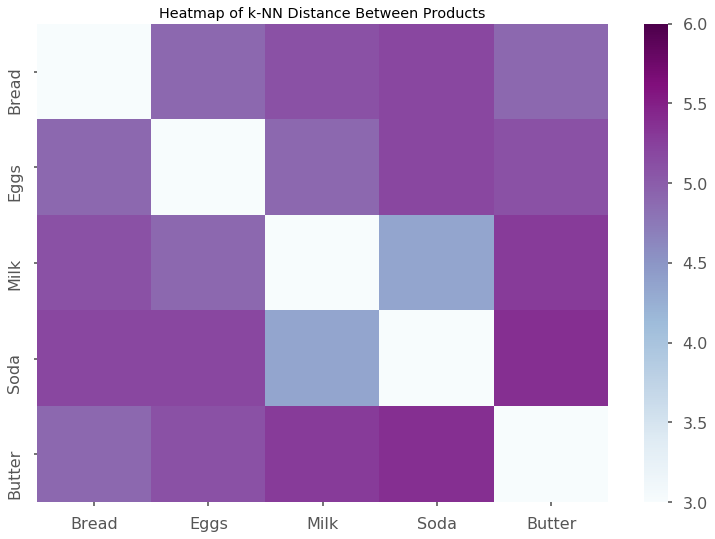

In [162]:
ax = plt.axes()
seaborn.heatmap(knnCluster,ax = ax, robust = True,vmin = 3, vmax = 6, cmap = "BuPu")

ax.set_title('Heatmap of k-NN Distance Between Products')
plt.show()

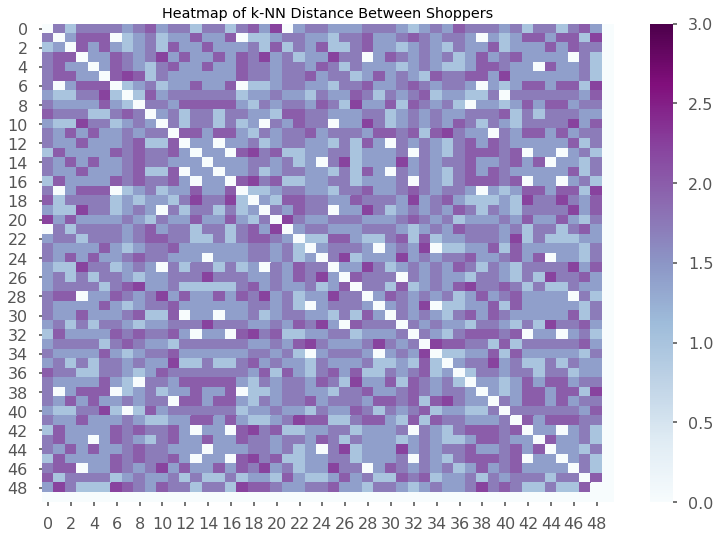

In [163]:
ax = plt.axes()
seaborn.heatmap(knnTotal, ax = ax, robust = True,vmin = 0, vmax = 3, cmap = "BuPu")

ax.set_title('Heatmap of k-NN Distance Between Shoppers')
plt.show()

In this lab we look at the k-nearest neighbors algorithm and a simple implementation based upon shopping a sample of customer carts.

First, we initialize a random set of shoppers with a uniform distribution to represent the probability of an item being in a given customers cart. Once we have a sample dataset of shoppers, we look at the proximity of the products to each other in the sample. The first heatmap shows the proximity between each product class in all the customers baskets. The second heatmap looks at the proximity of each shopper to each other by calculating the total distance between each shopper by evaluating the distance between their carts.

KNN is a useful algorithm that can give analyst insight into product relationships and potentially uncover interesting avenues for revenue, so it should be in the toolbox of every data engineer.